### SUPERVISED VECTOR MACHINE
SVM is a supervised machine learning algorithm which we are using for our regression problems. It uses a technique called the kernel trick to transform our data and then based on these transformations it would find an optimal boundary between the possible outputs. SVM could also be used for classification and outliers detection.

#### Classification
In this subsection, we will plot different SVM classifiers in the natural gas dataset. There are three common classes capable of performing multi-class classification on a dataset: These are SVC, NuSVC and LinearSVC. SVC and NuSVC are similar methods, but accept slightly different sets of parameters and have different mathematical formulations (see section Mathematical formulation). On the other hand, LinearSVC is another implementation of Support Vector Classification for the case of a linear kernel.

We commence by importing the required libraries for analysis.

In [1]:
%matplotlib inline

print(__doc__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets

Automatically created module for IPython interactive environment


We will now load the natural gas dataset.

In [3]:
# Read the data set
df=pd.read_excel("data/DataSet_GasPrice_ Outlier_Removed.xlsx")
df.head()

,Days,Date,AveCoalPrice,OilPrice,GrossGasProd,TotGasCons,GasPrice,Weather,WSTAT,GasPriceStatus,GPSAT,color
0,245,2008-12-31,57.22,41.12,2227.028,2399.702,5.82,WINTER,1,HIGH,1,1
1,276,2009-01-31,54.37,41.71,2251.938,2729.715,5.24,WINTER,1,HIGH,1,1
2,304,2009-02-28,52.30,39.09,2074.167,2332.539,4.52,WINTER,1,HIGH,1,1
3,335,2009-03-31,44.34,47.94,2262.488,2170.709,3.96,WINTER,1,HIGH,1,1
4,365,2009-04-30,41.92,49.65,2147.856,1741.293,3.50,SPRING,0,HIGH,1,1


Features - Average Coal Price and Gas Price, Target: Weather Status
Let us consider the features: average coal price (AveCoalPrice) and gas price (GasPrice) and classify them with respect to the Gas Price status: GPSAT 

In [4]:
# new dataframe (dfcoal) consisting of the two features: AveCoalPrice & GasPrice
dfcoal = df[['AveCoalPrice', 'GasPrice']]

In [6]:
# convert dfcoal to and the target 'WSTAT' column to numpy array
X = dfcoal.values
y = df.GPSAT.values

In [7]:
# step size in the mesh
h = .02  

In [8]:
# SVM regularization parameter
C = 1.0 

In [9]:
# fit SVC(kernel='linear')
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

In [10]:
# fit LinearSVC()
lin_svc = svm.LinearSVC(C=C).fit(X, y)

In [11]:
# fit rbf_svc 
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
# fit poly_svc 
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

In [12]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [13]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

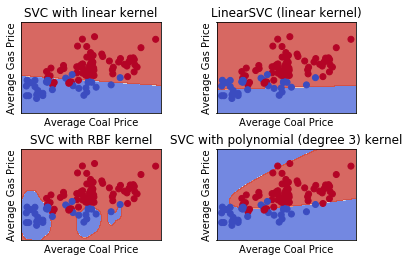

In [14]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Average Coal Price')
    plt.ylabel('Average Gas Price')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

We will now consider one feature at a time and gas price (GasPrice). We will classify them with respect to the weather status: WSTAT. <em> If the feature falls within the Wnter and Summer it is assigned the value 1, and zero if it falls within Spring and Fall. Using two-dim dataset allows us to avoid this slicing.

#### Features - Average Coal Price and Gas Price, Target: Weather Status 
Let us consider the features: average coal price (AveCoalPrice) and gas price (GasPrice) and classify them with respect to the weather status: WSTAT .

Let us create a new dataframe (dfcoal) consisting of the two features: AveCoalPrice & GasPrice

In [3]:
# new dataframe (dfcoal) consisting of the two features: AveCoalPrice & GasPrice
dfcoal = df[['AveCoalPrice', 'GasPrice']]

Let us convert dfcoal to and the target 'WSTAT' column to numpy array

In [4]:
# convert dfcoal to and the target 'WSTAT' column to numpy array
X = dfcoal.values
y = df.WSTAT.values

We will now:
(1) assign step size in the mesh (h)
(2) create an instance of SVM and fit our data. 
(3) assign an SVM regularization parameter (C)
We would not scale our data since we want to plot the support vectors

In [5]:
# step size in the mesh
h = .02  

In [6]:
# SVM regularization parameter
C = 1.0 

Let us fit *The linear models LinearSVC() and SVC(kernel='linear')

In [7]:
# fit SVC(kernel='linear')
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

In [8]:
# fit LinearSVC()
lin_svc = svm.LinearSVC(C=C).fit(X, y)

We will now fit the non-linear kernel models (polynomial or Gaussian RBF) 

In [9]:
# fit rbf_svc 
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
# fit poly_svc 
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

Let us create a mesh to plot in and titles for the plots

In [10]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [11]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

Finally we will plot the decision boundary. This will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
We will also carry out prediction using the classifier (clf) and put the result into a color plot. Then will plot the training points

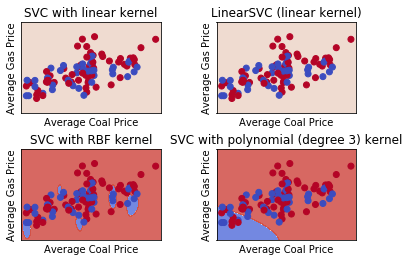

In [12]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Average Coal Price')
    plt.ylabel('Average Gas Price')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

#### Features - Oil Price and Gas Price, Target: Weather Status 
Let us consider the features: oil price (OilPrice) and gas price (GasPrice) and classify them with respect to the weather status: WSTAT.

In [13]:
# new dataframe (dfoil) consisting of the two features: OilPrice & GasPrice
dfoil = df[['OilPrice', 'GasPrice']]

In [14]:
# convert dfoil to and the target 'WSTAT' column to numpy array
X = dfoil.values

In [15]:
# fit SVC(kernel='linear')
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
# fit LinearSVC()
lin_svc = svm.LinearSVC(C=C).fit(X, y)


In [16]:
# fit rbf_svc 
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
# fit poly_svc 
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

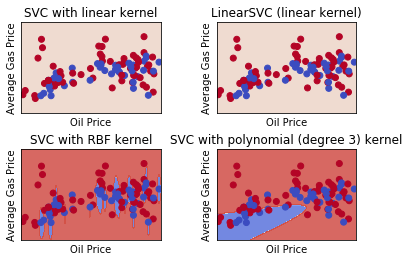

In [17]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Oil Price')
    plt.ylabel('Average Gas Price')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

#### Features - Gross Gass Production and Gas Price, Target: Weather Status 
Let us consider the features: Gross Gas Production (GrossGasProd) and gas price (GasPrice) and classify them with respect to the weather status: WSTAT.

In [18]:
# new dataframe (dfgprod) consisting of the two features: GrossGasProd & GasPrice
dfgprod = df[['GrossGasProd', 'GasPrice']]

In [19]:
# convert dfgprod to and the target 'WSTAT' column to numpy array
X = dfgprod.values

In [20]:
# fit SVC(kernel='linear')
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

In [21]:
# fit LinearSVC()
lin_svc = svm.LinearSVC(C=C).fit(X, y)

In [ ]:
# fit poly_svc 
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

In [ ]:
# fit rbf_svc 
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)

In [ ]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Oil Price')
    plt.ylabel('Gross Gas Production')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

#### Features - Total Gas Consumption and Gas Price, Target: Weather Status 
Let us consider the features: Total Gas Consumption (TotGasCons) and gas price (GasPrice) and classify them with respect to the weather status: WSTAT.

In [ ]:
-# new dataframe (dfgcons) consisting of the two features: Total Gas Consumption & GasPrice
dfgcoms = df[['TotGasCons', 'GasPrice']]

In [ ]:
# convert dfgcons to and the target 'WSTAT' column to numpy array
X = dfgcons.values

In [ ]:
# fit SVC(kernel='linear')
svc = svm.SVC(kernel='linear', C=C).fit(X, y)


In [ ]:
# fit LinearSVC()
lin_svc = svm.LinearSVC(C=C).fit(X, y)


In [ ]:
# fit rbf_svc 
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)


In [ ]:
# fit poly_svc 
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

In [ ]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Total Gas Consumed')
    plt.ylabel('Average Gas Price')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

The linear models LinearSVC() and SVC(kernel='linear') yield different decision boundaries. This can be due to any of the following reasons:
* LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
* LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

Both linear models have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.